# Outlier Detection by using Inter Quantile Range

**Outlier:** **Extremely Large Values and Extremely Small values in the data**

**Q1:** **75th percentile** 

**Q2:** **50th percentile,is called median.**

**Q3:** **25th percentile**

**IQR = Q3 -Q1**

**Anything Above** **= Q3 + 1.5 * IQR  , it means upper_limit**

**Anything Below** **=Q1 - 1.5 * IQR    ,it means lower_limit**

In [1]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv('C:/Users/Arushantha/Downloads/weight-height.csv')

In [7]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [9]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [12]:
Q1=df.Height.quantile(0.25)
Q3=df.Height.quantile(0.75)
Q1,Q3

(63.505620481218955, 69.1742617268347)

In [14]:
IQR=Q3-Q1
IQR

5.668641245615746

In [17]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(55.00265861279534, 77.67722359525831)

In [18]:
df[(df.Height<lower_limit)|(df.Height>upper_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [19]:
df_no_outliers=df[(df.Height>lower_limit)&(df.Height<upper_limit)]

In [20]:
df_no_outliers

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

(array([   5.,   18.,   66.,  152.,  322.,  604.,  870., 1036., 1117.,
        1079., 1108., 1059.,  891.,  721.,  510.,  255.,  120.,   43.,
          19.,    5.]),
 array([54.26313333, 55.49991378, 56.73669423, 57.97347468, 59.21025513,
        60.44703558, 61.68381603, 62.92059648, 64.15737693, 65.39415738,
        66.63093784, 67.86771829, 69.10449874, 70.34127919, 71.57805964,
        72.81484009, 74.05162054, 75.28840099, 76.52518144, 77.7619619 ,
        78.99874235]),
 <a list of 20 Patch objects>)

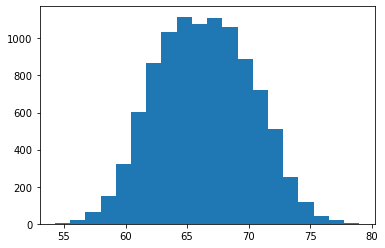

In [25]:
plt.hist(df.Height,bins=20)

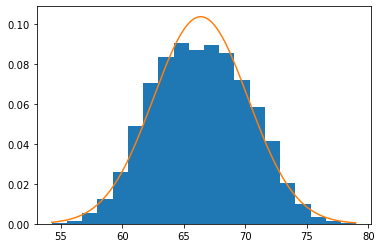

In [36]:
from scipy.stats import norm
plt.hist(df.Height,bins=20,density=True)

rang=np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(rang,norm.pdf(rang,df.Height.mean(),df.Height.std()))